In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [152]:
# Units: ms/double (stream benchmark)
T_copy = 1000/(12390*1024*1024/8)

def T_MPI_sendrecv(x):

    vals = {
         100 : 0.00678496,
         250 : 0.00596357,
         500 : 0.0071268,
         750 : 0.00770707,
        1000 : 0.00855314,
        1250 : 0.0163443,
        1500 : 0.0158122,
        2750 : 0.0204618,
        3000 : 0.0207946,
        3250 : 0.0208765,
        3500 : 0.0224531,
        3750 : 0.0232302,
        4000 : 0.0231601,
        4250 : 0.0260836,
        4500 : 0.0246662,
        4750 : 0.0271669,
        5000 : 0.0263327,
        5250 : 0.0289487,
        5500 : 0.0276995,
        5750 : 0.030467,
        6000 : 0.0305638,
        6250 : 0.031486,
        6500 : 0.0320459,
        6750 : 0.0311865,
        7000 : 0.0324595,
        7250 : 0.0327556,
        7500 : 0.0341002,
        7750 : 0.0346115,
        8000 : 0.0364048,
        8250 : 0.0361179,
        8500 : 0.0380242,
        8750 : 0.0380642,
        9000 : 0.0396022
    }
        
    points = list(vals.keys())
    
    p1 = points[0]
    t1 = vals[p1]
    p2 = points[0]
    t2 = vals[p2]
    
    for p in points[1:]:
        
        t1 = t2
        p1 = p2
        
        p2 = p
        t2 = vals[p2]
        
        if x <= p2:
            break
            
    pol = np.polyfit([p1,p2],[t1,t2],1)
    
    return pol[0]*x + pol[1]
    
# L, R, T, B
halo = [1,1,1,1]


In [156]:
T_perf = []
for i in range(500,8000,100):
    T_perf += [1000*(4*i*T_copy + 4*T_MPI_sendrecv(i) + 4*i*T_copy)]

In [157]:
x = [8000,4000,2667,2000,1600,1333,1144,1000,888,800,728,667,616,572,532,500]
y = [747.211,395.001,285.701,225.883,188.393,165.105,146.529,82.3504,57.826,47.4457,44.6562,41.8055,36.7853,36.9695,35.1103,32.895]

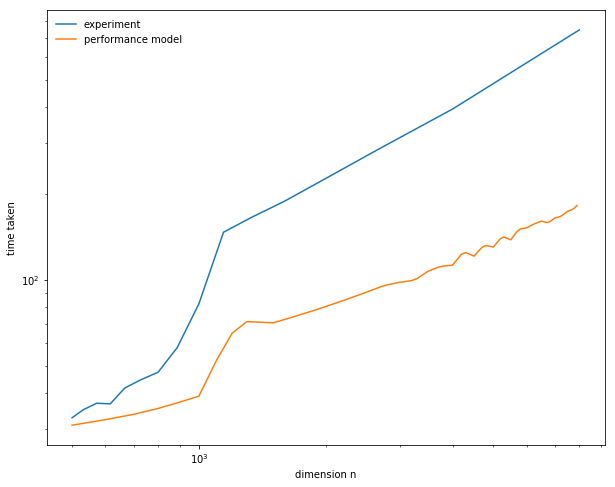

In [158]:
plt.figure(figsize=(10,8))
plt.loglog(x,y, label="experiment");
plt.loglog(therange, T_perf, label="performance model");
plt.xlabel("dimension n")
plt.ylabel("time taken")
plt.legend(frameon=False);